## 서울시 구별 주유소 데이터 수집 및 분석
https://www.opinet.co.kr/user/main/mainView.do
* 분석할 데이터 목록
    > 1. 기본정보 : 상표/상호/주소/가격(휘발유/경유)
    >    
    > 2. 부가정보 : 세차장 여부 / 충전소 여부 / 경정비 여부 / 편의점 여부 / 24시 영업 여부 
* 데이터프레임 설계
    > 기본정보 -> 부가정보 순으로 column설정
    > 
* 시각화
    > 1. 주유비가 비싼 동네는 세차장이 많을까?
    > 2. 주유비가 비싼 동네는 24시간 영업을 많이 할까?
    > 3. 휘발유가 비싼 동네 vs 경유가 비싼 동네 

## 1. 데이터 분석

### (1) 기본 설정

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

prefs = {'download.default_directory' : '/home/hyeji/dev_ws/eda/data',
         'download.promt_for_download': False}
options.add_experimental_option('prefs',prefs)

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("../driver/chromedriver-linux64/chromedriver"),
                          options=options)
driver.get(url)

### 중복을 피하기 위해 부가정보 Y/N정보 가져오는 함수 만들기 !
#### (feat.파라미터 변수 설정)

In [28]:
def service(id,src):
    if driver.find_element(By.ID,id):
        tag = driver.find_element(By.ID,id)
        if tag.get_attribute("src").split('/')[-1] == src :
            return "Y"
        return "N"

In [29]:
#세차장
cwsh ="cwsh_yn"
cwsh_src ='oil_station_service1_01.gif'

#충전소
lpg = "lpg_yn"
lpg_src = "oil_station_service1_02_01.gif"

#경정비
maint = "maint_yn"
maint_src = "oil_station_service1_03.gif"

#편의점
cvs = "cvs_yn"
cvs_src = "oil_station_service1_04.gif"

#24시영업
sel24 = "sel24_yn"
sel24_src = "oil_station_service1_05.gif"

### 주유소 상세정보를 불러오기 위해 ~ 
'body1'안에 있는 'rlist'안에 'a['href']값을 누르자

In [30]:
import time
from selenium.webdriver.common.by import By
add_info = driver.find_element(By.ID, "body1")
add_info_list = add_info.find_elements(By.CLASS_NAME,"rlist")

내가 생각한 링크 잘 가져오는건지 확인 !

In [31]:
for i , n in enumerate(add_info_list) :
    print("["+str(i)+"]==============="+n.text)

[0]===============십정주유소 셀프
[1]===============유카스에너지 열우... 셀프 전산
[2]===============주식회사 인에너지 셀프 전산
[3]===============팔도셀프주유소 셀프 전산
[4]===============장수셀프주유소 셀프
[5]===============(주)정현에너지 셀프
[6]===============갈산셀프주유소 셀프
[7]===============HD현대오일뱅크㈜... 셀프 전산
[8]===============유항주유소 셀프
[9]===============동양산업(주)직영... 셀프
[10]===============새현에너지(주)
[11]===============아크로셀프주유소 셀프
[12]===============SK에너지㈜ 보보... 셀프 전산
[13]===============산곡하이웨이주유소 셀프
[14]===============HD현대오일뱅크㈜... 셀프 전산
[15]===============SK에너지(주) ... 셀프 전산
[16]===============굿데이셀프주유소 셀프
[17]===============지에스칼텍스(주)... 셀프 전산
[18]===============굿모닝주유소 셀프
[19]===============고개마루주유소
[20]===============부개주유소 셀프
[21]===============지에스칼텍스(주)... 셀프 전산
[22]===============SK에너지 대양셀... 셀프 전산
[23]===============SK에너지 삼성셀... 셀프 전산
[24]===============구도일주유소 셀프 전산
[25]===============(주)태보에너지 ... 셀프
[26]===============㈜소모 동양7주유... 셀프 전산
[27]===============㈜한국주유소 전산
[28]===============씨앤에스유통(주)... 셀프
[29]===============하이웨이주유소 셀프
[30]=========

### 버튼 클릭 잘되는지, 상세정보 창 잘 띄워주는지 확인 !

In [32]:
link_element = add_info_list[1].find_element(By.TAG_NAME, "a")
link_element.click()


### 세차장 정보 잘 나오나 화긴 ~~~~

뭐냐 ㄷㄷ 있어야 되는데 왜 없다 하냐

In [33]:
if driver.find_element(By.ID,"cwsh_yn"):
    tag = driver.find_element(By.ID,"cwsh_yn")
    if tag.get_attribute("src") == "/images/user/gis/oil_station_service1_01.gif" :
        print("세차장 있음")
    else :
        print("세차장 없음 ")

세차장 없음 


복사한 엘리먼트값이랑 이름이 다르네 ;;;;
직접 찍어보자 ~

In [34]:
if driver.find_element(By.ID,"lpg_yn"):
    print("find_element !")
    tag = driver.find_element(By.ID,"lpg_yn")
    print(tag.get_attribute("src"))

find_element !
https://www.opinet.co.kr/images/user/gis/oil_station_service1_02_01_off.gif


In [35]:
tag.get_attribute("src").split('/')[-1]

'oil_station_service1_02_01_off.gif'

### 부가 기능들 세차장/충전소/경정비/편의점/24시영업 순으로 리스트 만들기 
#### 리스트 안에는 Y/N으로 표기!

In [36]:
cwsh_list = []
lpg_list = []
maint_list = []
cvs_list = []
sel24_list = []

for idx, name in enumerate(add_info_list):
    link_element = add_info_list[idx].find_element(By.TAG_NAME, "a")
    time.sleep(0.5)
    link_element.click()
    time.sleep(0.5)
    cwsh_list.append(service(cwsh,cwsh_src))
    lpg_list.append(service(lpg,lpg_src))
    maint_list.append(service(maint,maint_src))
    cvs_list.append(service(cvs,cvs_src))
    sel24_list.append(service(sel24,sel24_src))

print(cwsh_list)
print("cwsh : "+ str(len(cwsh_list)))
print(lpg_list)
print("lpg : " + str(len(lpg_list)))

['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y']
cwsh : 38
['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
lpg : 38


## 2. 상세정보 창에서 기본정보 상표/주유소명/주소/가격 가져오자 

아까 쓰던 상세정보창 코드 긁어오기

In [37]:
link_element = add_info_list[5].find_element(By.TAG_NAME, "a")
link_element.click()

0. 기본 정보 가져오기 위한 새로운 단축키 만들기

In [38]:
base_info = driver.find_element(By.ID, "os_dtail_info")

1. 상표 가져오기

In [39]:
base_info = driver.find_element(By.ID, "os_dtail_info")
label = base_info.find_element(By.ID, "poll_div_nm")
print(label.text)

S-OIL


2. 나머지 정보 몽땅 가져오기

In [40]:
label = base_info.find_element(By.ID, "poll_div_nm")
station = base_info.find_element(By.ID, "os_nm")
address = base_info.find_element(By.ID, "rd_addr")
gasoline = base_info.find_element(By.ID, "b027_p")

label.text, station.text, address.text, gasoline.text

('S-OIL', '(주)정현에너지', '인천 부평구 장제로 379 (삼산동)', '1,605')

3. 가오떨어진다;; 정보 가져오는 함수 만들장 쿄쿄

In [41]:
label_list = []
def get_info(id):
    return base_info.find_element(By.ID, id).text

label = get_info("poll_div_nm")
label

'S-OIL'

In [42]:
type(label)

str

잘되네 적용 ㄱ

In [43]:
label_list = []
station_list = []
address_list = []
gasoline_list = []

for idx, name in enumerate(add_info_list):
    link_element = add_info_list[idx].find_element(By.TAG_NAME, "a")
    time.sleep(0.5)
    link_element.click()
    time.sleep(0.5)
    base_info = driver.find_element(By.ID, "os_dtail_info")
    time.sleep(0.5)
    label_list.append(get_info("poll_div_nm"))
    time.sleep(0.5)
    station_list.append(get_info("os_nm"))
    time.sleep(0.5)
    address_list.append(get_info("rd_addr"))
    time.sleep(0.5)
    gasoline_list.append(get_info("b027_p"))
    time.sleep(0.5)

print(address_list)
print(len(station_list))

['인천광역시 부평구 경원대로 1037', '인천 부평구 경원대로 1132 (십정동)', '인천 부평구 경원대로 1091', '인천 부평구 마장로 199 (산곡동)', '인천 부평구 백범로 502', '인천 부평구 장제로 379 (삼산동)', '인천 부평구 장제로 362', '', '인천 부평구 주부토로 273 (갈산동)', '', '인천 부평구 경인로 1216 (구산동)', '', '인천 부평구 무네미로 471', '', '인천 부평구 경인로 1195 (구산동)', '인천 부평구 장제로 347 (삼산동)', '인천 부평구 장제로 335 (갈산1동)', '', '인천 부평구 서달로 338', '인천 부평구 원적로 294 (산곡동)', '인천 부평구 경인로 1050 (부개동)', '', '인천 부평구 평천로 545 (삼산동)', '인천 부평구 평천로 546 (삼산동)', '인천 부평구 경인로 1020', '인천 부평구 경인로 1182-1 (일신동)', '', '인천 부평구 경인로 795 (십정동)', '인천 부평구 청중로 109 (청천동)', '', '', '인천 부평구 서달로 308 (청천동)', '인천 부평구 장제로 151 (부평동)', '인천 부평구 부평대로 96', '', '인천 부평구 마장로 144 (산곡동)', '인천 부평구 길주로 390 (산곡동)', '']
38


### 엥 !!! 빈칸이 많다 ... selenium은 창에서 벗어나면 정보가 안보인다 ...ㅠㅠ

In [44]:
import pandas as pd

information = pd.DataFrame({"상표":label_list,
                            "상호": station_list,
                            "주소":address_list,
                            "휘발유":gasoline_list,
                            "세차장": cwsh_list,
                            "충전소":lpg_list,
                            "경정비":maint_list})
information


,상표,상호,주소,휘발유,세차장,충전소,경정비
0,HD현대오일뱅크,십정주유소,인천광역시 부평구 경원대로 1037,"1,597",Y,N,N
1,SK에너지,,인천 부평구 경원대로 1132 (십정동),"1,597",Y,N,N
2,S-OIL,주식회사 인에너지,인천 부평구 경원대로 1091,"1,597",Y,N,N
3,S-OIL,팔도셀프주유소,인천 부평구 마장로 199 (산곡동),"1,597",Y,N,N
4,SK에너지,장수셀프주유소,인천 부평구 백범로 502,"1,598",N,N,Y
5,S-OIL,(주)정현에너지,인천 부평구 장제로 379 (삼산동),"1,605",Y,N,N
6,SK에너지,갈산셀프주유소,인천 부평구 장제로 362,"1,605",Y,N,N
7,,,,"1,607",Y,N,N
8,SK에너지,유항주유소,인천 부평구 주부토로 273 (갈산동),"1,610",Y,N,Y
9,,,,"1,612",Y,N,N


#### 해결법 1. 위로가기 버튼을 10번 정도 누르게 시켜볼까?

In [5]:
# //*[@id="map_div"]/div[5]/div[1]/div/div/div[2]

#<div class="control-panup ollehmap-control-clickable ollehmap-event" data-id="ollehmap1709103557210" style="background-image: url(&quot;https://api.ktgis.com:443/ollehmap/resource/v3/img/controls.png&quot;); left: 30px; top: 11px; position: absolute;"></div>



In [88]:
for i in range(15):
    driver.find_element(By.XPATH, '''//*[@id="map_div"]/div[5]/div[1]/div/div/div[2]''').click()
    time.sleep(0.5)


KeyboardInterrupt: 

### 해결법2. bs4랑 같이 쓰자

In [45]:
from bs4 import BeautifulSoup

page = driver.page_source
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())


<html lang="ko">
 <head>
  <title>
   싼 주유소 찾기 Opinet &gt; 싼주유소찾기 &gt; 지역별
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="text/javascript" http-equiv="Content-Script-Type"/>
  <meta content="text/css" http-equiv="Content-Style-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="initial-scale=1.0,user-scalable=no" name="viewport"/>
  <link href="/css/user/gis.css" media="screen" rel="stylesheet" type="text/css"/>
  <script src="/js/user/jquery-1.11.1.min.js" type="text/javascript">
  </script>
  <script src="/js/user/OpinetUIGis.js" type="text/javascript">
  </script>
  <script src="/js/user/OpinetUICommon.js" type="text/javascript">
  </script>
  <script src="/js/user/fammilySite.js" type="text/javascript">
  </script>
  <script src="/js/com/common-ajax.js" type="text/javascript">
  </script>
  <script src="/js/com/common.js" type="text/javascript">
  </script>
  <script src="/js/user/gis_ui_script.js" ty

아주 깔끔 나이수 !~

In [46]:
label_element = soup.find('label', id='os_nm')
label_element.text

'동암주유소'

### 기본 정보는 bS4 로 파싱해서 데이터 만들자

In [47]:
label_list = []
station_list = []
address_list = []
gasoline_list = []
diesel_list = []

In [48]:
def base_info_bs4(page):
    soup = BeautifulSoup(page, "html.parser")
    label_list.append(soup.find('label', id='poll_div_nm').text)
    station_list.append(soup.find('label', id='os_nm').text)
    address_list.append(soup.find('label', id= 'rd_addr').text)
    gasoline_list.append(soup.find('label', id = 'b027_p').text)
    diesel_list.append(soup.find('label', id = 'd047_p').text)



In [49]:
for idx, name in enumerate(add_info_list):
    link_element = add_info_list[idx].find_element(By.TAG_NAME, "a")
    time.sleep(0.5)
    link_element.click()
    time.sleep(0.5)
    page = driver.page_source
    base_info_bs4(page)
   


In [50]:
address_list

['인천광역시 부평구 경원대로 1037',
 '인천 부평구 경원대로 1132 (십정동)',
 '인천 부평구 경원대로 1091',
 '인천 부평구 마장로 199 (산곡동)',
 '인천 부평구 백범로 502',
 '인천 부평구 장제로 379 (삼산동)',
 '인천 부평구 장제로 362',
 '인천 부평구 경원대로 1049',
 '인천 부평구 주부토로 273 (갈산동)',
 '인천 부평구 부평북로 154 (청천동)',
 '인천 부평구 경인로 1216 (구산동)',
 '인천 부평구 무네미로 431 (구산동)',
 '인천 부평구 무네미로 471',
 '인천 부평구 원적로 417 (산곡동)',
 '인천 부평구 경인로 1195 (구산동)',
 '인천 부평구 장제로 347 (삼산동)',
 '인천 부평구 장제로 335 (갈산1동)',
 '인천 부평구 장제로 200',
 '인천 부평구 서달로 338',
 '인천 부평구 원적로 294 (산곡동)',
 '인천 부평구 경인로 1050 (부개동)',
 '인천 부평구 평천로 429 (삼산동)',
 '인천 부평구  평천로 545 (삼산동)',
 '인천 부평구 평천로 546 (삼산동)',
 '인천 부평구 경인로 1020',
 '인천 부평구 경인로 1182-1 (일신동)',
 '인천 부평구 경인로 1130 (일신동)',
 '인천 부평구 경인로 795 (십정동)',
 '인천 부평구 청중로 109 (청천동)',
 '인천 부평구 부평대로 222',
 '인천 부평구 부평대로 262 (갈산동)',
 '인천 부평구 서달로 308 (청천동)',
 '인천 부평구  장제로 151 (부평동)',
 '인천 부평구 부평대로 96',
 '인천 부평구 마장로 173 (산곡동)',
 '인천 부평구 마장로 144 (산곡동)',
 '인천 부평구 길주로 390 (산곡동)',
 '인천 부평구 열우물로 19 (십정동)']

In [51]:
len(address_list)

38

### (추가)'서울시'를 기본값으로 설정하자

In [52]:
from selenium.webdriver.common.by import By
sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
default_sido = sido_list[1].get_attribute("value")
default_sido
                                          

'서울특별시'

In [53]:
sido.send_keys(default_sido)

### 정리 끝 !! 구별로 데이터 찾기 ㄱ ㄱ 

In [54]:
sigungu = driver.find_element(By.ID, "SIGUNGU_NM0")
sigungu_list = sigungu.find_elements(By.TAG_NAME,"option")
for idx, name in enumerate(sigungu_list):
    print(str(idx) + " :  "+ name.get_attribute("value"))

0 :  
1 :  강남구
2 :  강동구
3 :  강북구
4 :  강서구
5 :  관악구
6 :  광진구
7 :  구로구
8 :  금천구
9 :  노원구
10 :  도봉구
11 :  동대문구
12 :  동작구
13 :  마포구
14 :  서대문구
15 :  서초구
16 :  성동구
17 :  성북구
18 :  송파구
19 :  양천구
20 :  영등포구
21 :  용산구
22 :  은평구
23 :  종로구
24 :  중구
25 :  중랑구


In [64]:
sigungu_names =[name.get_attribute("value") for name in sigungu_list]
sigungu_names = sigungu_names[1:]
sigungu_names

MaxRetryError: HTTPConnectionPool(host='localhost', port=48579): Max retries exceeded with url: /session/9266d1fd8169dc95134c0f7027bbb6c9/execute/sync (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f231719aec0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [55]:

import time
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup

label_list = []
station_list = []
address_list = []
gasoline_list = []
cwsh_list = []
lpg_list = []
maint_list = []
cvs_list = []
sel24_list = []
diesel_list = []

for name in tqdm(sigungu_names):
    sigungu = driver.find_element(By.ID, "SIGUNGU_NM0")
    sigungu.send_keys(name)
    driver.implicitly_wait(3)

    add_info = driver.find_element(By.ID, "body1")
    add_info_list = add_info.find_elements(By.CLASS_NAME,"rlist")

    for idx, name in enumerate(add_info_list):
        link_element = add_info_list[idx].find_element(By.TAG_NAME, "a")
        time.sleep(0.5)
        link_element.click()
        time.sleep(0.5)

        cwsh_list.append(service(cwsh,cwsh_src))
        lpg_list.append(service(lpg,lpg_src))
        maint_list.append(service(maint,maint_src))
        cvs_list.append(service(cvs,cvs_src))
        sel24_list.append(service(sel24,sel24_src))

        page = driver.page_source
        base_info_bs4(page)




  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:

import time
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup

label_list = []
station_list = []
address_list = []
gasoline_list = []
cwsh_list = []
lpg_list = []
maint_list = []
cvs_list = []
sel24_list = []
diesel_list = []

for name in tqdm(sigungu_names):
    sigungu = driver.find_element(By.ID, "SIGUNGU_NM0")
    sigungu.send_keys(name)
    driver.implicitly_wait(3)

    add_info = driver.find_element(By.ID, "body1")
    add_info_list = add_info.find_elements(By.CLASS_NAME,"rlist")

    for idx in len(add_info_list):
        link_element = add_info_list[idx].find_element(By.TAG_NAME, "a")
        time.sleep(0.5)
        link_element.click()
        time.sleep(0.5)

        cwsh_list.append(service(cwsh,cwsh_src))
        lpg_list.append(service(lpg,lpg_src))
        maint_list.append(service(maint,maint_src))
        cvs_list.append(service(cvs,cvs_src))
        sel24_list.append(service(sel24,sel24_src))

        page = driver.page_source
        base_info_bs4(page)




In [56]:
address_list

['서울 강남구  헌릉로 731 (세곡동)',
 '서울 강남구 헌릉로 730',
 '서울 강남구  남부순환로 2718 (도곡2동)',
 '서울 강남구 남부순환로 2651 (도곡동)',
 '서울 강남구 논현로 152 (도곡동)',
 '서울 강남구 밤고개로 120 (자곡동)',
 '서울 강남구 언주로 423 (역삼동)',
 '서울 강남구 밤고개로 215 (율현동)',
 '서울 강남구 테헤란로 619 (삼성동)',
 '서울 강남구 양재대로55길 3 (일원동)',
 '서울 강남구 역삼로 142',
 '서울 강남구 도곡로 162 (도곡동)',
 '서울 강남구 강남대로 640 (신사동)',
 '서울 강남구 광평로 202 (수서동)',
 '서울 강남구 도곡로 208',
 '서울 강남구 논현로 516 (역삼동)',
 '서울 강남구 논현로 640',
 '서울 강남구 언주로 842 (신사동)',
 '서울 강남구 양재대로 339',
 '서울 강남구 도산대로 163 (신사동)',
 '서울 강남구 삼성로 563 (삼성동)',
 '서울 강남구 영동대로 235',
 '서울 강남구 봉은사로113길 51',
 '서울 강남구 남부순환로 3170 (일원2동)',
 '서울 강남구 압구정로 302 (신사동)',
 '서울 강남구 도곡로 249 (역삼동)',
 '서울 강남구 개포로 654 (일원동)',
 '서울 강남구 삼성로 335',
 '서울 강남구 압구정로 154',
 '서울 강남구 논현로 747 (논현동)',
 '서울 강남구 언주로 716',
 '서울 강남구 봉은사로 433 (삼성동)',
 '서울특별시 강동구  천호대로 1246 (둔촌제2동)',
 '서울 강동구 구천면로 357 (암사동)',
 '서울 강동구 동남로 811 (명일동)',
 '서울 강동구 고덕로 39 (암사동)',
 '서울 강동구 양재대로 1323 (성내동)',
 '서울 강동구 천호대로 1168',
 '서울 강동구  상일로 132 (강일동)',
 '서울 강동구 고덕로 168 (명일동)',
 '서울 강동구 성안로 102 (성내동)',

In [57]:
len(gasoline_list)

437

In [58]:
import pandas as pd

information = pd.DataFrame({"상표":label_list,
                            "주유소 이름": station_list,
                            "주소":address_list,
                            "휘발유":gasoline_list,
                            "경유":diesel_list,
                            "세차장": cwsh_list,
                            "충전소":lpg_list,
                            "경정비":maint_list})
information

,상표,주유소 이름,주소,휘발유,경유,세차장,충전소,경정비
0,SK에너지,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),"1,635","1,535",Y,N,N
1,HD현대오일뱅크,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,"1,645","1,554",Y,N,N
2,HD현대오일뱅크,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),"1,669","1,579",Y,N,Y
3,SK에너지,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),"1,675","1,595",Y,N,Y
4,HD현대오일뱅크,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),"1,679","1,594",Y,N,Y
...,...,...,...,...,...,...,...,...
432,S-OIL,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),"1,639","1,539",N,N,N
433,SK에너지,신내주유소,서울 중랑구 용마산로 705 (신내동),"1,652","1,553",Y,N,N
434,SK에너지,용마로주유소,서울 중랑구 용마산로 309 (면목동),"1,658","1,538",Y,N,N
435,SK에너지,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),"1,659","1,568",Y,N,Y


In [59]:
driver.quit()

In [60]:
information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상표      437 non-null    object
 1   주유소 이름  437 non-null    object
 2   주소      437 non-null    object
 3   휘발유     437 non-null    object
 4   경유      437 non-null    object
 5   세차장     437 non-null    object
 6   충전소     437 non-null    object
 7   경정비     437 non-null    object
dtypes: object(8)
memory usage: 27.4+ KB


In [61]:
information.to_csv('../data/gass.csv',sep=',',encoding='utf-8')

In [3]:
import pandas as pd
gass_station_data = pd.read_csv('../data/gass.csv',sep=',',encoding='utf-8')
gass_station_data = gass_station_data.iloc[:,1:]


/tmp/ipykernel_6150/2185010557.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
gass_station_data

,상표,주유소 이름,주소,휘발유,경유,세차장,충전소,경정비
0,SK에너지,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),"1,635","1,535",Y,N,N
1,HD현대오일뱅크,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,"1,645","1,554",Y,N,N
2,HD현대오일뱅크,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),"1,669","1,579",Y,N,Y
3,SK에너지,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),"1,675","1,595",Y,N,Y
4,HD현대오일뱅크,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),"1,679","1,594",Y,N,Y
...,...,...,...,...,...,...,...,...
432,S-OIL,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),"1,639","1,539",N,N,N
433,SK에너지,신내주유소,서울 중랑구 용마산로 705 (신내동),"1,652","1,553",Y,N,N
434,SK에너지,용마로주유소,서울 중랑구 용마산로 309 (면목동),"1,658","1,538",Y,N,N
435,SK에너지,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),"1,659","1,568",Y,N,Y


### '구'칼럼을 추가하자

In [5]:
gass_station_data["구"] = [gu.split(' ')[1] for gu in gass_station_data["주소"]] 

In [6]:
gass_station_data["구"].unique() , len(gass_station_data["구"].unique())

(array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
        '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object),
 25)

In [7]:
gass_station_data.loc[3]["주소"].split(' ')[1]

'강남구'

#### 휘발유,경유 가격 정보를 float형으로 !

In [8]:
gass_station_data = gass_station_data[gass_station_data["휘발유"]!= '-']

In [9]:
gass_station_data["휘발유"] = [gasoline.replace(',','') for gasoline in gass_station_data["휘발유"]] 

In [10]:
gass_station_data["휘발유"] = gass_station_data["휘발유"].astype("float")

In [11]:
gass_station_data["경유"] = [gasoline.replace(',','') for gasoline in gass_station_data["경유"]] 

In [12]:
gass_station_data["경유"] = gass_station_data["경유"].astype("float")

In [13]:
gass_station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상표      437 non-null    object 
 1   주유소 이름  437 non-null    object 
 2   주소      437 non-null    object 
 3   휘발유     437 non-null    float64
 4   경유      437 non-null    float64
 5   세차장     437 non-null    object 
 6   충전소     437 non-null    object 
 7   경정비     437 non-null    object 
 8   구       437 non-null    object 
dtypes: float64(2), object(7)
memory usage: 30.9+ KB


## 3. 시각화 

### 그래프 1. 주유비가 비싸면 세차장이 많을까? 

#### Y/N으로 표시한 [세차장]을 1/0으로 바꾸자 

In [14]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [15]:
cwash_rate =gass_station_data["세차장"]
cwash_rate= [gasoline.replace('Y','1') for gasoline in cwash_rate]
cwash_rate = [gasoline.replace('N','0') for gasoline in cwash_rate]
#gass_station_data["세차장 수 "]= cwash_rate

In [16]:
len(cwash_rate)

437

In [17]:
import numpy as np
gass_station_data["세차장 수 "] =  [int(char) for char in cwash_rate]
cwash_data = pd.pivot_table(data=gass_station_data, index="구", values="세차장 수 ", aggfunc=np.sum)
cwash_data

/tmp/ipykernel_6150/3070019048.py:3: FutureWarning: The provided callable <function sum at 0x7fcce59a3a30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cwash_data = pd.pivot_table(data=gass_station_data, index="구", values="세차장 수 ", aggfunc=np.sum)


,세차장 수
구,
강남구,29
강동구,12
강북구,9
강서구,25
관악구,10
광진구,9
구로구,12
금천구,8
노원구,11


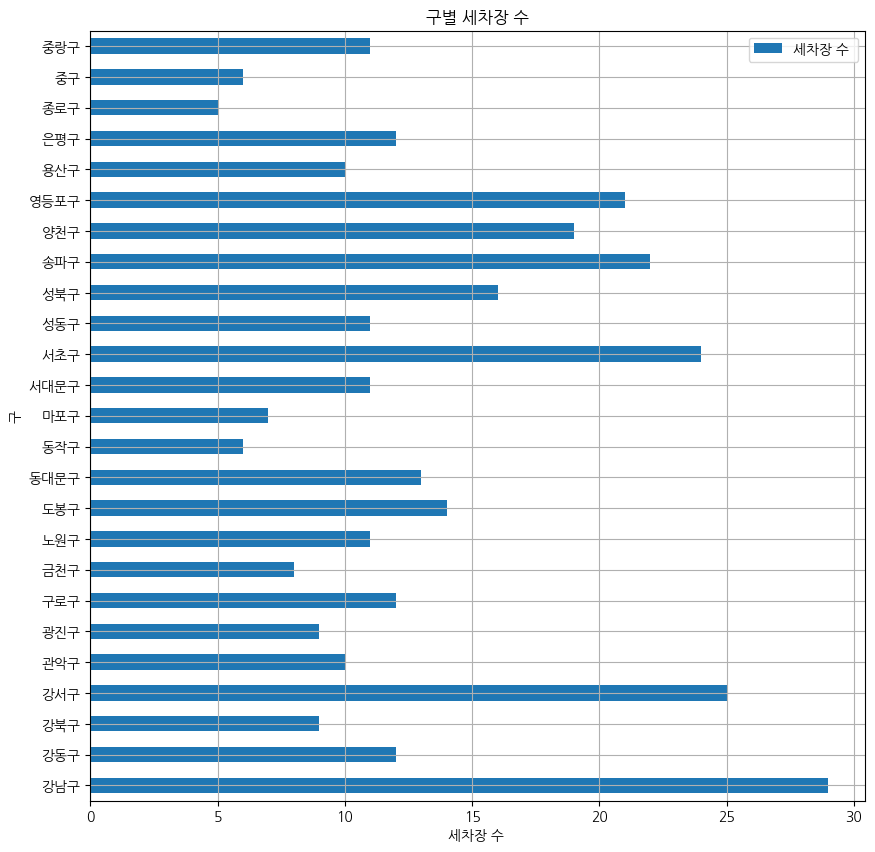

In [18]:
# cwash_data.plot(kind='barh', grid=True, figsize=(10,10))  # 그래프 그리는 부분
cwash_graph = cwash_data.plot(kind='barh', grid=True, figsize=(10,10))  # 그래프를 ax 변수에 할당하여 제목을 추가할 준비
cwash_graph.set_title("구별 세차장 수")  # 그래프에 제목 추가
cwash_graph.set_xlabel("세차장 수 ")
plt.show()


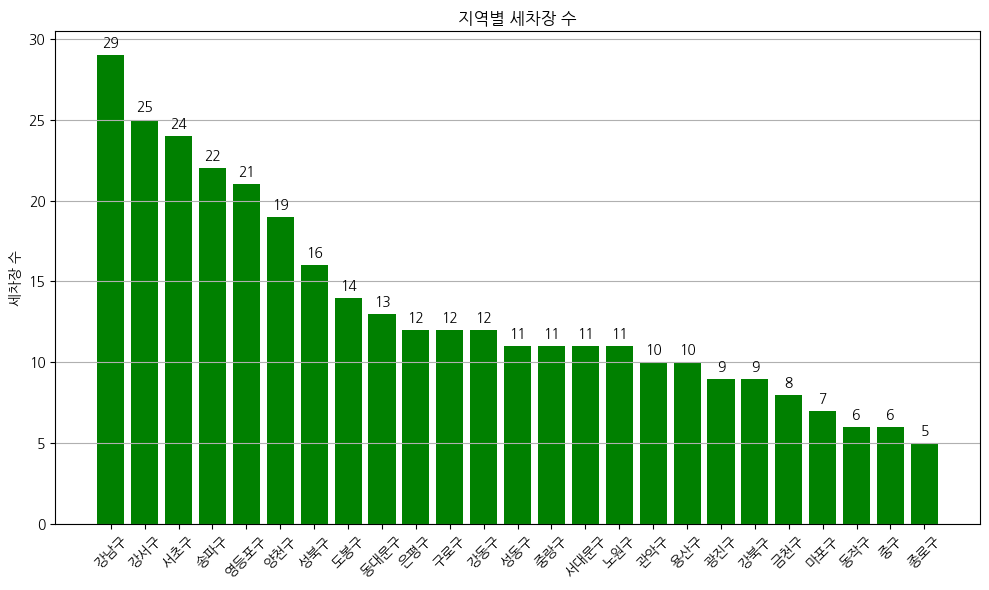

In [19]:
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sorted_cwash_data = cwash_data.sort_values(by='세차장 수 ',ascending=False)
plt.bar(sorted_cwash_data.index, sorted_cwash_data['세차장 수 '], color='green')

# x축, y축 레이블 및 제목 설정
plt.ylabel('세차장 수')
plt.title('지역별 세차장 수')

# 그래프에 숫자 표시
for i, v in enumerate(sorted_cwash_data['세차장 수 ']):
    plt.text(i, v + 0.5, str(v), ha='center', color='black')

plt.xticks(rotation=45)  # x축 레이블 회전

plt.grid(axis='y')  # 그리드 표시

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [20]:
import numpy as np
gu_price_data = pd.pivot_table(data=gass_station_data, index="구", values=["경유","휘발유"], aggfunc=np.mean)
gu_price_data

/tmp/ipykernel_6150/4102934650.py:2: FutureWarning: The provided callable <function mean at 0x7fcce59c09d0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gu_price_data = pd.pivot_table(data=gass_station_data, index="구", values=["경유","휘발유"], aggfunc=np.mean)


,경유,휘발유
구,,
강남구,1823.625000,1915.312500
강동구,1641.142857,1736.500000
강북구,1523.333333,1618.416667
강서구,1587.000000,1673.666667
관악구,1589.571429,1693.714286
광진구,1556.384615,1657.923077
구로구,1580.705882,1683.647059
금천구,1558.090909,1657.090909
노원구,1557.714286,1651.428571


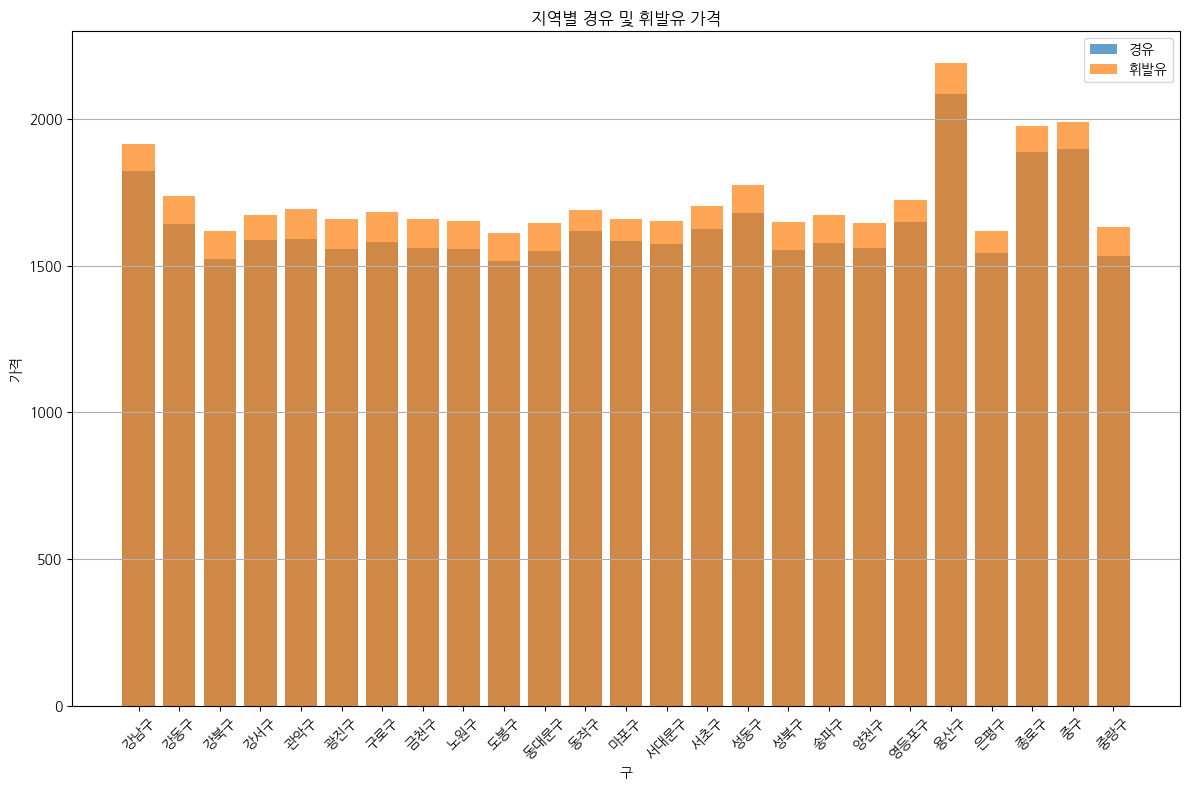

In [21]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# 경유 가격 막대 그래프
plt.bar(gu_price_data.index, gu_price_data['경유'], label='경유', alpha=0.7)

# 휘발유 가격 막대 그래프
plt.bar(gu_price_data.index, gu_price_data['휘발유'], label='휘발유', alpha=0.7)

# 레이블, 제목 설정
plt.xlabel('구')
plt.ylabel('가격')
plt.title('지역별 경유 및 휘발유 가격')
plt.xticks(rotation=45)

plt.legend()  # 범례 표시

plt.grid(axis='y')  # 그리드 표시

plt.tight_layout()
plt.show()

In [22]:
graph1_df = gu_price_data
graph1_df["세차장 수"]=cwash_data['세차장 수 ']
graph1_df

,경유,휘발유,세차장 수
구,,,
강남구,1823.625000,1915.312500,29
강동구,1641.142857,1736.500000,12
강북구,1523.333333,1618.416667,9
강서구,1587.000000,1673.666667,25
관악구,1589.571429,1693.714286,10
광진구,1556.384615,1657.923077,9
구로구,1580.705882,1683.647059,12
금천구,1558.090909,1657.090909,8
노원구,1557.714286,1651.428571,11


In [23]:
import numpy as np
fp1 = np.polyfit(graph1_df["휘발유"], graph1_df["세차장 수"],1)
fp1

array([-4.28523107e-03,  2.07100976e+01])

In [24]:
f1 = np.poly1d(fp1)

In [25]:
fx = np.linspace(1500,2000,100)

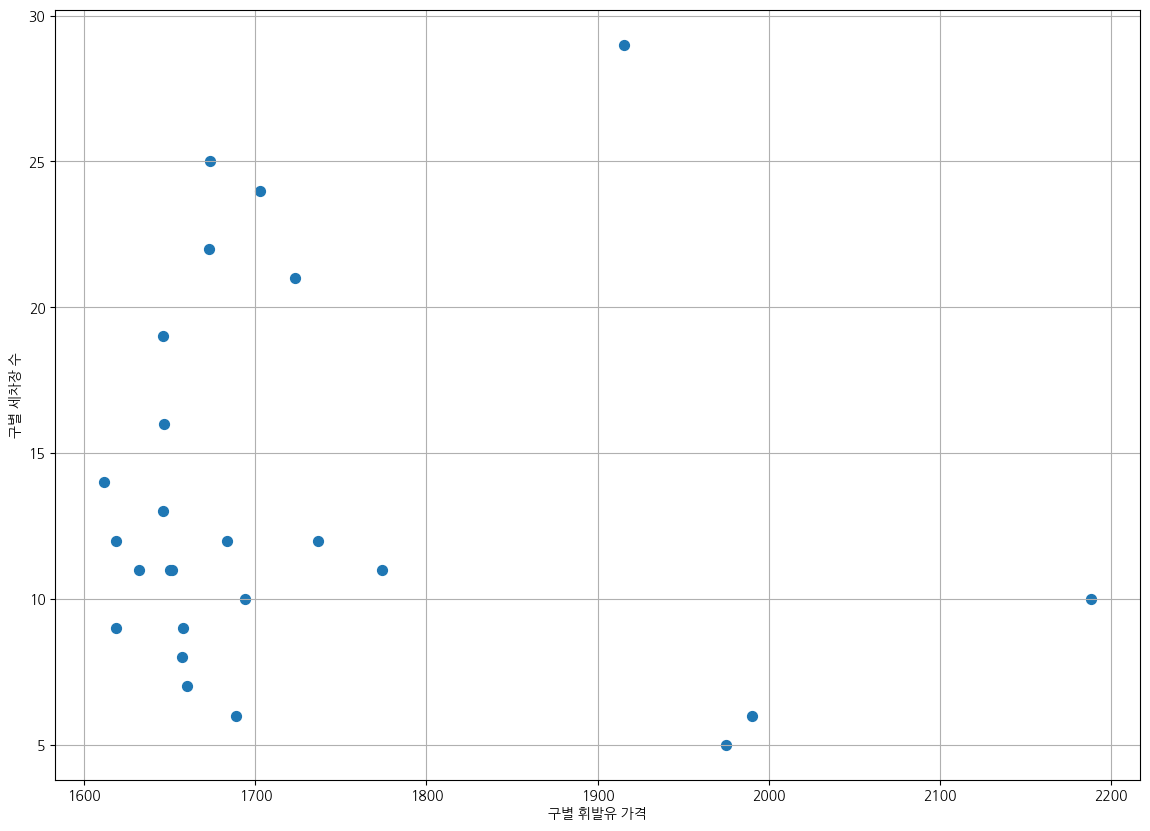

In [48]:
plt.figure(figsize=(14,10))
plt.scatter(graph1_df["휘발유"], graph1_df["세차장 수"], s=50)
plt.xlabel("구별 휘발유 가격")
plt.ylabel("구별 세차장 수")
plt.grid()
plt.show()

결론 : 유류비와 세차장의 수 사이에는 경향이 나타나지 않는다. 

#### 서울시 유류비 BoxPlot로 확인하기

In [26]:
import seaborn as sns
%matplotlib inline


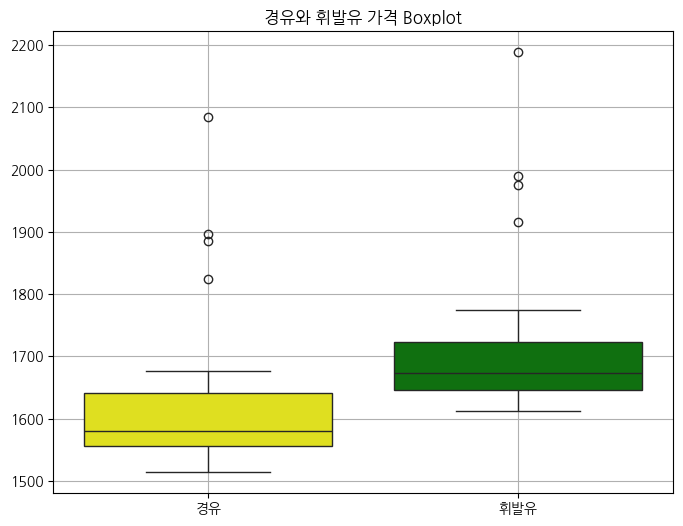

In [27]:
# 경유와 휘발유 가격에 대한 boxplot 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data=graph1_df[['경유', '휘발유']], palette=["yellow", "green"])
plt.title('경유와 휘발유 가격 Boxplot')
plt.grid(True)
plt.show()

In [28]:
gass_station_data

,상표,주유소 이름,주소,휘발유,경유,세차장,충전소,경정비,구,세차장 수
0,SK에너지,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1635.0,1535.0,Y,N,N,강남구,1
1,HD현대오일뱅크,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,1645.0,1554.0,Y,N,N,강남구,1
2,HD현대오일뱅크,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1669.0,1579.0,Y,N,Y,강남구,1
3,SK에너지,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1675.0,1595.0,Y,N,Y,강남구,1
4,HD현대오일뱅크,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),1679.0,1594.0,Y,N,Y,강남구,1
...,...,...,...,...,...,...,...,...,...,...
432,S-OIL,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1639.0,1539.0,N,N,N,중랑구,0
433,SK에너지,신내주유소,서울 중랑구 용마산로 705 (신내동),1652.0,1553.0,Y,N,N,중랑구,1
434,SK에너지,용마로주유소,서울 중랑구 용마산로 309 (면목동),1658.0,1538.0,Y,N,N,중랑구,1
435,SK에너지,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1659.0,1568.0,Y,N,Y,중랑구,1


In [29]:
gass_station_data.drop(columns=['세차장 수 '], inplace=True)
gass_station_data

,상표,주유소 이름,주소,휘발유,경유,세차장,충전소,경정비,구
0,SK에너지,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1635.0,1535.0,Y,N,N,강남구
1,HD현대오일뱅크,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,1645.0,1554.0,Y,N,N,강남구
2,HD현대오일뱅크,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1669.0,1579.0,Y,N,Y,강남구
3,SK에너지,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1675.0,1595.0,Y,N,Y,강남구
4,HD현대오일뱅크,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),1679.0,1594.0,Y,N,Y,강남구
...,...,...,...,...,...,...,...,...,...
432,S-OIL,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1639.0,1539.0,N,N,N,중랑구
433,SK에너지,신내주유소,서울 중랑구 용마산로 705 (신내동),1652.0,1553.0,Y,N,N,중랑구
434,SK에너지,용마로주유소,서울 중랑구 용마산로 309 (면목동),1658.0,1538.0,Y,N,N,중랑구
435,SK에너지,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1659.0,1568.0,Y,N,Y,중랑구


#### 서울시 주유소 편의시설 현황

In [30]:
facilities_data = pd.pivot_table(data=gass_station_data, index="구", values=["세차장","충전소","경정비"], aggfunc=np.sum)
facilities_data.head()

/tmp/ipykernel_6150/2867926514.py:1: FutureWarning: The provided callable <function sum at 0x7fcce59a3a30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  facilities_data = pd.pivot_table(data=gass_station_data, index="구", values=["세차장","충전소","경정비"], aggfunc=np.sum)


,경정비,세차장,충전소
구,,,
강남구,NNYYYNYNNNYYNNNYNNNNNYNNNNNNNYNN,YYYYYYYYYNYYNYYNYYYYYYYYYYYYYYYY,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
강동구,NNNNNNYNYNYNYY,YNYYYYYNYYYYYY,NNNNNNNNNNNNNN
강북구,NNNNNNNYYNNY,NYNNYYYYYYYY,NNNNNNNNNNNN
강서구,NYNNNYNYNYNNYNNNNNNNNNYNNYYYNYNNN,NYNYYNNYYYYYYYYYNYNYNYYYYYYYNYYYY,NNNNNNNNNYNNYNNNNNNNNNNNNNNNNNNNN
관악구,NNNNNNNYYNYNNN,NYYYNYNYYYYYYN,NNNNNNNNNNNNNN


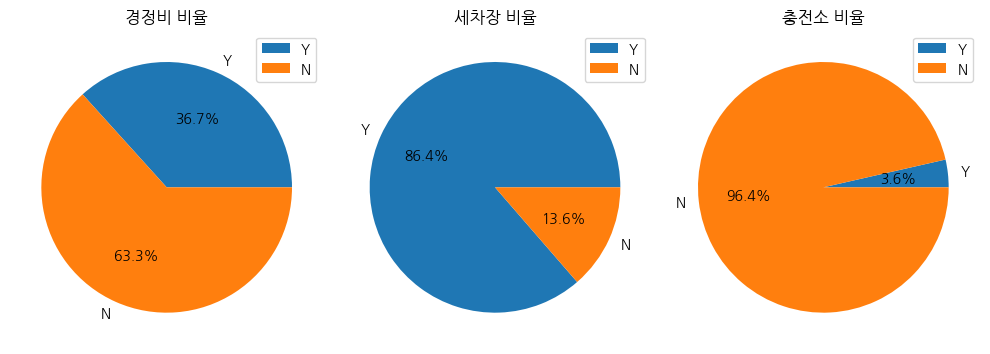

In [50]:
# Y와 N의 수 계산
counts = facilities_data.apply(lambda x: pd.Series([x.str.count('Y').sum(), x.str.count('N').sum()], index=['Y', 'N']))

# 비율 계산
total_counts = counts.sum(axis=1)
ratios = counts.div(total_counts, axis=0)

# 그래프 그리기
fig, axs = plt.subplots(1, 3, figsize=(10, 30))

for i, col in enumerate(facilities_data.columns):
    ratios.loc[:, col].plot(kind='pie', ax=axs[i], autopct='%1.1f%%')
    axs[i].set_title(f'{col} 비율')
    axs[i].set_ylabel('')
    axs[i].legend(labels=['Y', 'N'])

plt.tight_layout()
plt.show()